In [ ]:
#An Car Price Prediction Using Machine Learning.
#Reference: https://doi.org/10.5281/zenodo.15308198
#Reference: An Analysis of Car Price Prediction Using Machine Learning
#Author: Harshavardhan Manavalan , Manoj SM
#Revision:R 0.1 may 16, 2025

Importing required modules

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


Load Dataset

In [ ]:
# Load the data
df = pd.read_csv('/content/car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
33,ertiga,2014,6.00,9.95,45000,Diesel,Dealer,Manual,0
183,Bajaj Discover 100,2013,0.27,0.47,21000,Petrol,Individual,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


Label Encoding

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Calculate Car Age
if 'Year' in df.columns:
    YearBegin = date.today().year
    df['Car_Age'] = YearBegin - df['Year']
    df = df.drop(['Year'], axis=1)

# Drop Car_Name if present
if 'Car_Name' in df.columns:
    df = df.drop(['Car_Name'], axis=1)

# Label Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Ensure all data is integer-type
df = df.astype(int)

# Preview the processed DataFrame
df.head()


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3,5,27000,2,0,1,0,11
1,4,9,43000,1,0,1,0,12
2,7,9,6900,2,0,1,0,8
3,2,4,5200,2,0,1,0,14
4,4,6,42450,1,0,1,0,11


In [ ]:
print(df)

     Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0                3              5       27000          2            0   
1                4              9       43000          1            0   
2                7              9        6900          2            0   
3                2              4        5200          2            0   
4                4              6       42450          1            0   
..             ...            ...         ...        ...          ...   
296              9             11       33988          1            0   
297              4              5       60000          2            0   
298              3             11       87934          2            0   
299             11             12        9000          1            0   
300              5              5        5464          2            0   

     Transmission  Owner  Car_Age  
0               1      0       11  
1               1      0       12  
2              

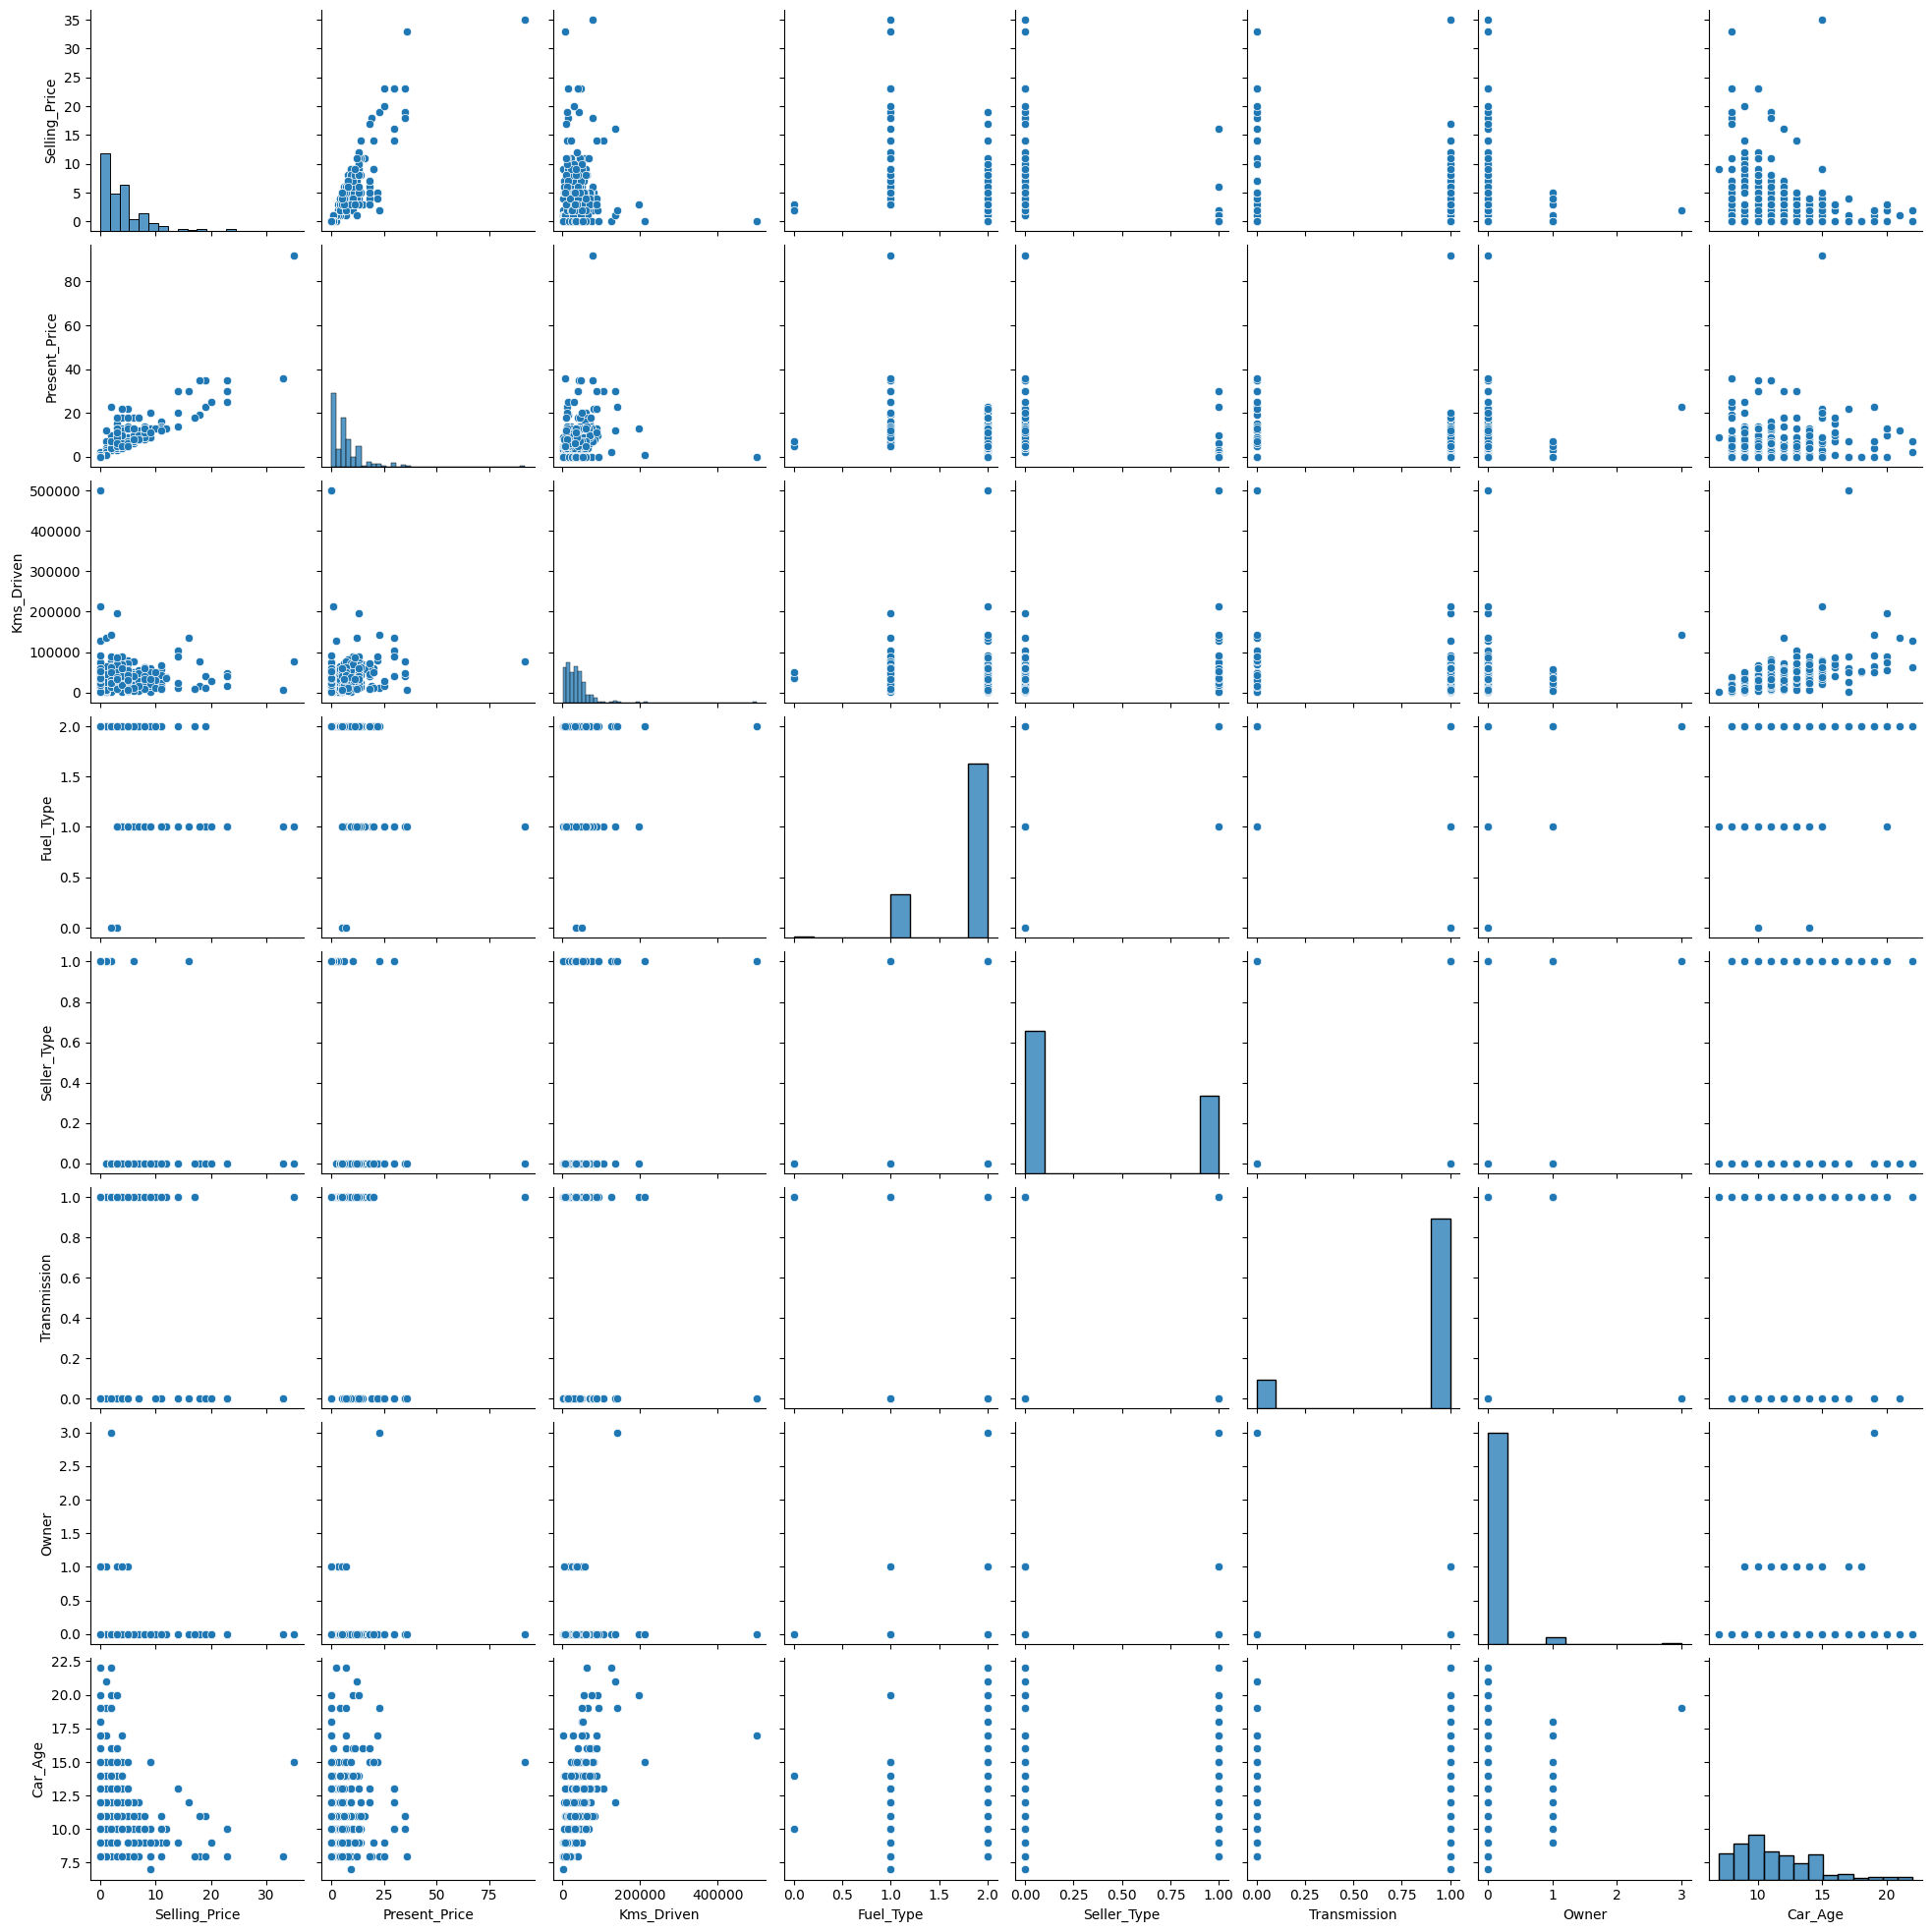

In [ ]:
#Relation analysis
sns.pairplot(df)

correlation matrix

               Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
Selling_Price       1.000000       0.877518    0.032597  -0.503878   
Present_Price       0.877518       1.000000    0.206896  -0.439934   
Kms_Driven          0.032597       0.206896    1.000000  -0.166801   
Fuel_Type          -0.503878      -0.439934   -0.166801   1.000000   
Seller_Type        -0.542332      -0.515092   -0.101419   0.352415   
Transmission       -0.367935      -0.349275   -0.162510   0.080466   
Owner              -0.083877       0.007089    0.089216   0.055705   
Car_Age            -0.229302       0.049269    0.524342   0.053643   

               Seller_Type  Transmission     Owner   Car_Age  
Selling_Price    -0.542332     -0.367935 -0.083877 -0.229302  
Present_Price    -0.515092     -0.349275  0.007089  0.049269  
Kms_Driven       -0.101419     -0.162510  0.089216  0.524342  
Fuel_Type         0.352415      0.080466  0.055705  0.053643  
Seller_Type       1.000000      0.063240  0.124269  0.

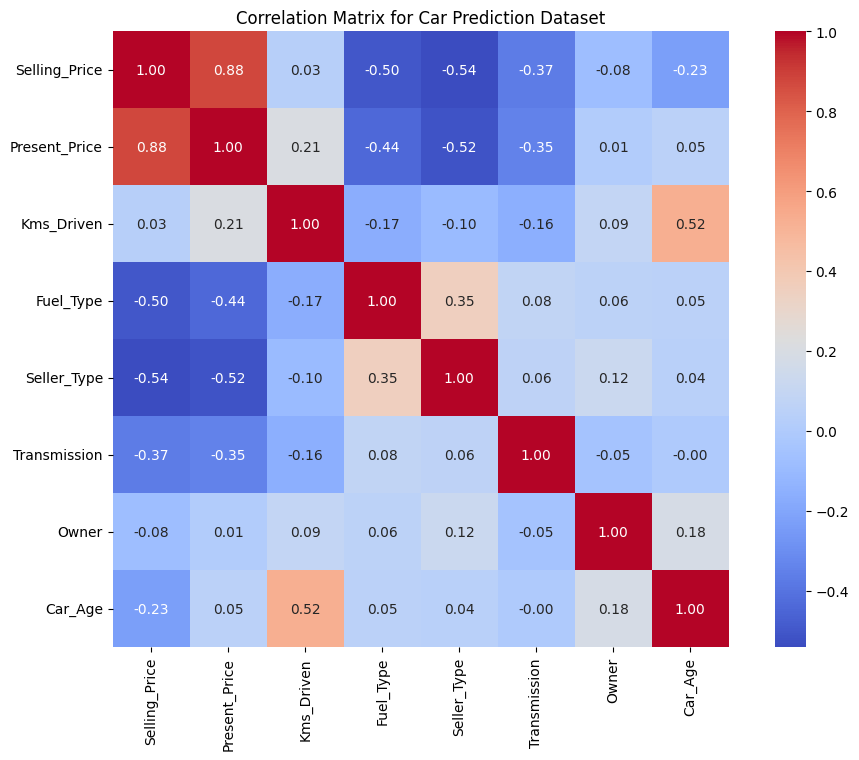

In [ ]:

# Compute correlation matrix
corr_matrix = df.corr()

# Print correlation matrix (optional)
print(corr_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Car Prediction Dataset')
plt.show()

Splitting of Data

In [ ]:
# Separate target and features
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Display the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (270, 7)
X_test shape: (31, 7)
y_train shape: (270,)
y_test shape: (31,)


Algorithms Implementation By Splitting

In [ ]:
# Predict and evaluate
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)

r2_train_lin = r2_score(y_train, y_train_pred_lin)
r2_test_lin = r2_score(y_test, y_test_pred_lin)
# Print results
print("Linear Regression R² - Train:", r2_train_lin)
print("Linear Regression R² - Test :", r2_test_lin)


Linear Regression R² - Train: 0.8730402159548096
Linear Regression R² - Test : 0.8102236878152287


In [ ]:
# Predict and evaluate

# Lasso Regression
lasso = Lasso(alpha=0.1)  # You can tune alpha
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print results
print("Lasso Regression R²  - Train:", r2_train_lasso)
print("Lasso Regression R²  - Test :", r2_test_lasso)



Lasso Regression R²  - Train: 0.8628244200689791
Lasso Regression R²  - Test : 0.8369079035900029


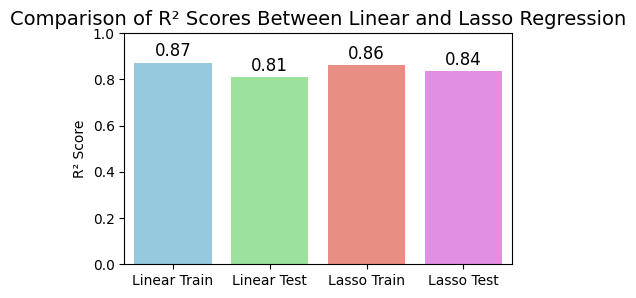

In [ ]:
# R² scores
scores = [r2_train_lin, r2_test_lin,r2_train_lasso,r2_test_lasso]
labels = ['Linear Train', 'Linear Test', 'Lasso Train', 'Lasso Test']
colors = ['skyblue', 'lightgreen', 'salmon', 'violet']

# Plot
plt.figure(figsize=(5, 3))
sns.barplot(x=labels, y=scores, palette=colors)

# Add values on top of bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Titles and labels
plt.title('Comparison of R² Scores Between Linear and Lasso Regression', fontsize=14)
plt.ylabel('R² Score')
plt.ylim(0, 1)

# Show plot
plt.show()

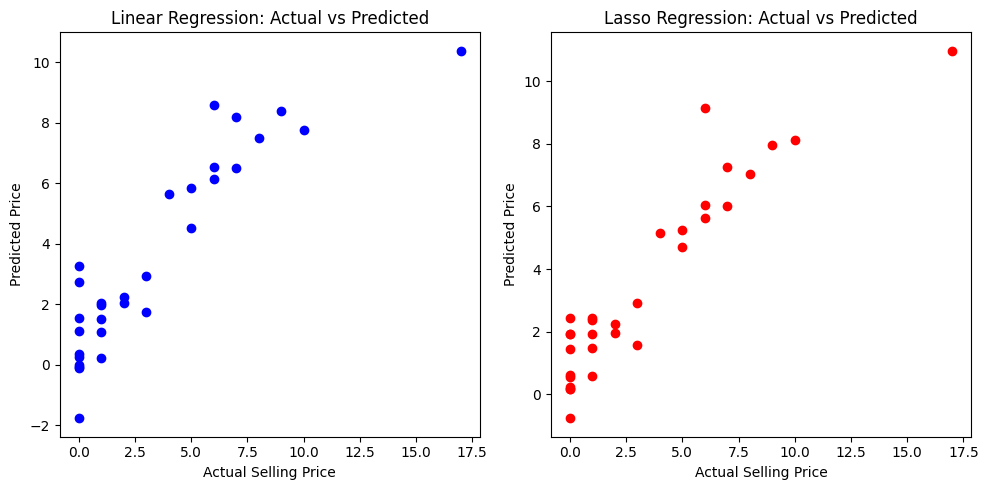

In [ ]:
plt.figure(figsize=(10, 5))

# Plot Linear Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_lin, color='blue')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Price")

# Plot Lasso Regression predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lasso, color='red')
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()


In [ ]:
#Decision Tree
# Import required libraries
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluate the model using R² score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Decision Tree Regression R² - Train:", r2_train)
print("Decision Tree Regression R² - Test :", r2_test)

Decision Tree Regression R² - Train: 1.0
Decision Tree Regression R² - Test : 0.962605548854041


In [ ]:
#Multivariate Regression
#Import libraries
from sklearn.linear_model import LinearRegression

# Initialize and train the model
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

# Predict
y_train_pred_multi= multi_reg.predict(X_train)
y_test_pred_multi= multi_reg.predict(X_test)

# Evaluate
r2_train = r2_score(y_train, y_train_pred_multi)
r2_test = r2_score(y_test, y_test_pred_multi)


# Print results
print("Multivariate Regression R² - Train:", r2_train)
print("Multivariate Regression R² - Test :", r2_test)

Multivariate Regression R² - Train: 0.8730402159548096
Multivariate Regression R² - Test : 0.8102236878152287


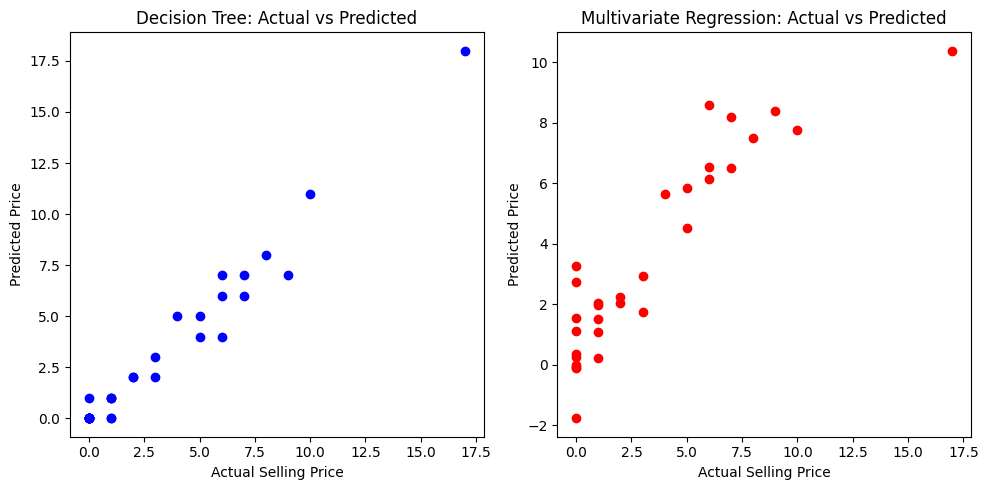

In [ ]:
plt.figure(figsize=(10, 5))

# Plot Decision Tree predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, color='blue')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Price")

# Plot Multivariate Regression predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_multi, color='red')
plt.title("Multivariate Regression: Actual vs Predicted")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Initialize and train the model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Evaluate
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Print results
print("Ridge Regression R² - Train:", r2_train_ridge)
print("Ridge Regression R² - Test :", r2_test_ridge)
print("Ridge Regression MAE      :", mae_ridge)
print("Ridge Regression RMSE     :", rmse_ridge)


Ridge Regression R² - Train: 0.8730102847939957
Ridge Regression R² - Test : 0.8129149021648671
Ridge Regression MAE      : 1.0921824489960712
Ridge Regression RMSE     : 1.7043995924533986


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Evaluate
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Print results
print("Random Forest R² - Train:", r2_train_rf)
print("Random Forest R² - Test :", r2_test_rf)
print("Random Forest MAE       :", mae_rf)
print("Random Forest RMSE      :", rmse_rf)


Random Forest R² - Train: 0.9865862094179585
Random Forest R² - Test : 0.9624900415493901
Random Forest MAE       : 0.45741935483870966
Random Forest RMSE      : 0.7631767224420694


In [ ]:
#  XGBoost Regression
from xgboost import XGBRegressor

# Initialize and train the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predict
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

# Evaluate
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

# Print results
print("XGBoost R² - Train:", r2_train_xgb)
print("XGBoost R² - Test :", r2_test_xgb)
print("XGBoost MAE       :", mae_xgb)
print("XGBoost RMSE      :", rmse_xgb)


XGBoost R² - Train: 0.9985504746437073
XGBoost R² - Test : 0.9592109322547913
XGBoost MAE       : 0.46393513679504395
XGBoost RMSE      : 0.795836388913292


Algorithm Implementation By CrossValidation

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Define the model
lr_model = LinearRegression()

# Use KFold with shuffle to avoid biased splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')

# Print the results
print("Linear Regression - 5 Fold R² Scores:", cv_scores)
print("Linear Regression - Mean R² Score   :", round(cv_scores.mean(), 4))



Linear Regression - 5 Fold R² Scores: [0.83232938 0.77394494 0.75351711 0.82619332 0.88653272]
Linear Regression - Mean R² Score   : 0.8145


In [ ]:
#  Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

cv_scores_lasso = cross_val_score(lasso, X, y, cv=kf, scoring='r2')

print("Lasso Regression - 5 Fold R² Scores:", cv_scores_lasso)
print("Lasso Regression - Mean R² Score   :", round(cv_scores_lasso.mean(), 4))


Lasso Regression - 5 Fold R² Scores: [0.82812922 0.74837459 0.79388311 0.82387017 0.88202152]
Lasso Regression - Mean R² Score   : 0.8153


In [ ]:
# Multivariate Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Multivariate Linear Regression
multi_lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_multi_lr = cross_val_score(multi_lr, X, y, cv=kf, scoring='r2')

print("Multivariate Linear Regression - 5 Fold R² Scores:", cv_scores_multi_lr)
print("Multivariate Linear Regression - Mean R² Score   :", round(cv_scores_multi_lr.mean(), 4))


Multivariate Linear Regression - 5 Fold R² Scores: [0.83232938 0.77394494 0.75351711 0.82619332 0.88653272]
Multivariate Linear Regression - Mean R² Score   : 0.8145


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

cv_scores_ridge = cross_val_score(ridge, X, y, cv=kf, scoring='r2')

print("Ridge Regression - 5 Fold R² Scores:", cv_scores_ridge)
print("Ridge Regression - Mean R² Score   :", round(cv_scores_ridge.mean(), 4))


Ridge Regression - 5 Fold R² Scores: [0.83285502 0.77300671 0.75902876 0.82633503 0.88697025]
Ridge Regression - Mean R² Score   : 0.8156


In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

cv_scores_dt = cross_val_score(dt, X, y, cv=kf, scoring='r2')

print("Decision Tree - 5 Fold R² Scores:", cv_scores_dt)
print("Decision Tree - Mean R² Score   :", round(cv_scores_dt.mean(), 4))


Decision Tree - 5 Fold R² Scores: [0.9254398  0.81347452 0.7643472  0.8895173  0.90052324]
Decision Tree - Mean R² Score   : 0.8587


In [ ]:
#  Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

cv_scores_rf = cross_val_score(rf, X, y, cv=kf, scoring='r2')

print("Random Forest - 5 Fold R² Scores:", cv_scores_rf)
print("Random Forest - Mean R² Score   :", round(cv_scores_rf.mean(), 4))


Random Forest - 5 Fold R² Scores: [0.95227666 0.89730129 0.83355004 0.89338005 0.93852765]
Random Forest - Mean R² Score   : 0.903


In [ ]:
# XGBoost Regression
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)

cv_scores_xgb = cross_val_score(xgb, X, y, cv=kf, scoring='r2')

print("XGBoost - 5 Fold R² Scores:", cv_scores_xgb)
print("XGBoost - Mean R² Score   :", round(cv_scores_xgb.mean(), 4))


XGBoost - 5 Fold R² Scores: [0.93617308 0.96352029 0.85631883 0.90608722 0.93704456]
XGBoost - Mean R² Score   : 0.9198


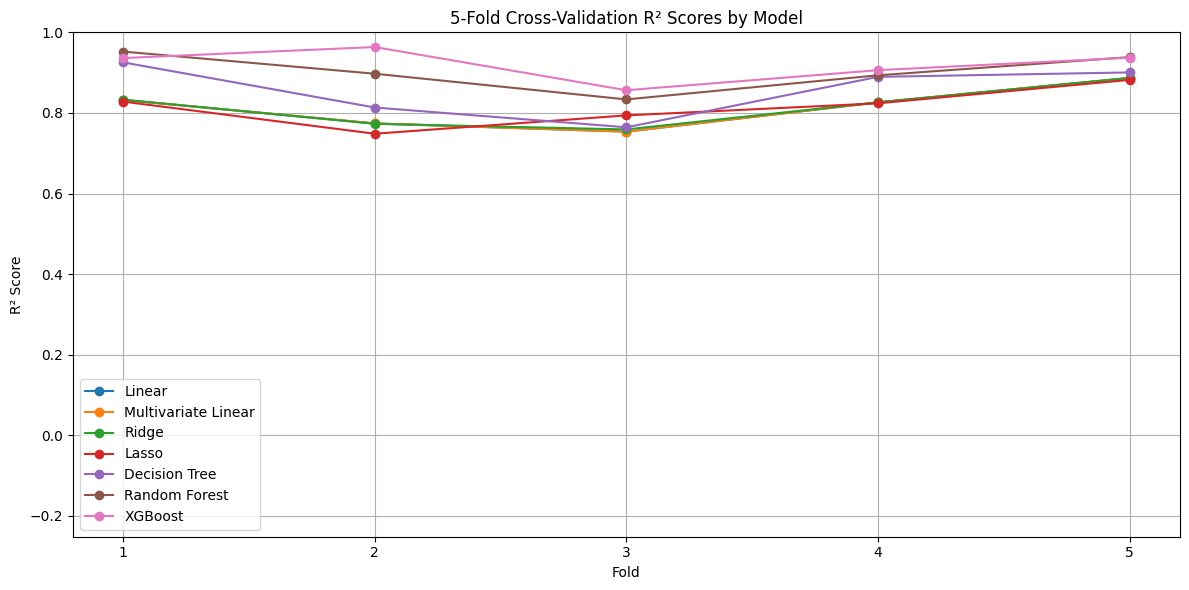

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store all CV scores in a dictionary (must run after you've run the individual CV blocks)
cv_results = {
    "Linear": cv_scores,
    "Multivariate Linear": cv_scores_multi_lr,
    "Ridge": cv_scores_ridge,
    "Lasso": cv_scores_lasso,
    "Decision Tree": cv_scores_dt,
    "Random Forest": cv_scores_rf,
    "XGBoost": cv_scores_xgb
}

# Plot
plt.figure(figsize=(12, 6))

for model_name, scores in cv_results.items():
    plt.plot(range(1, len(scores) + 1), scores, marker='o', label=model_name)

plt.title("5-Fold Cross-Validation R² Scores by Model")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.xticks(range(1, 6))
plt.ylim(min([score.min() for score in cv_results.values()]) - 1, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


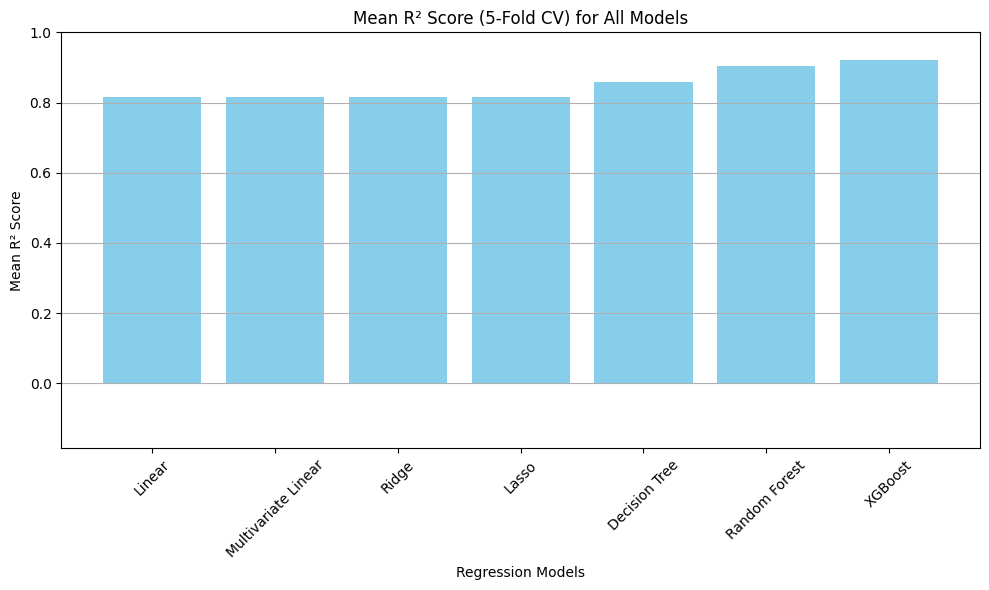

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary of mean R² scores
mean_r2_scores = {
    "Linear": np.mean(cv_scores),
    "Multivariate Linear": np.mean(cv_scores_multi_lr),
    "Ridge": np.mean(cv_scores_ridge),
    "Lasso": np.mean(cv_scores_lasso),
    "Decision Tree": np.mean(cv_scores_dt),
    "Random Forest": np.mean(cv_scores_rf),
    "XGBoost": np.mean(cv_scores_xgb)
}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(mean_r2_scores.keys(), mean_r2_scores.values(), color='skyblue')
plt.title("Mean R² Score (5-Fold CV) for All Models")
plt.ylabel("Mean R² Score")
plt.xlabel("Regression Models")
plt.xticks(rotation=45)
plt.ylim(min(mean_r2_scores.values()) - 1, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


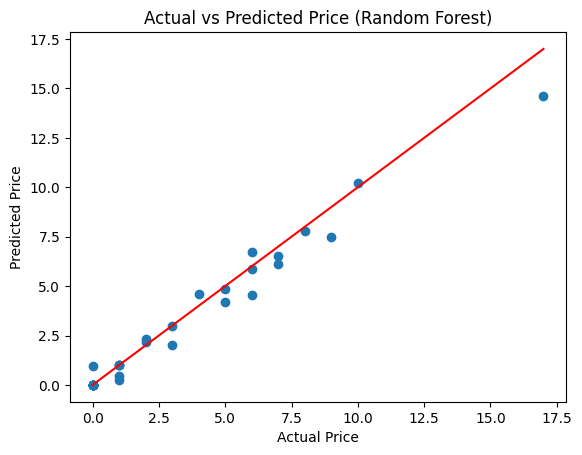

In [ ]:


best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


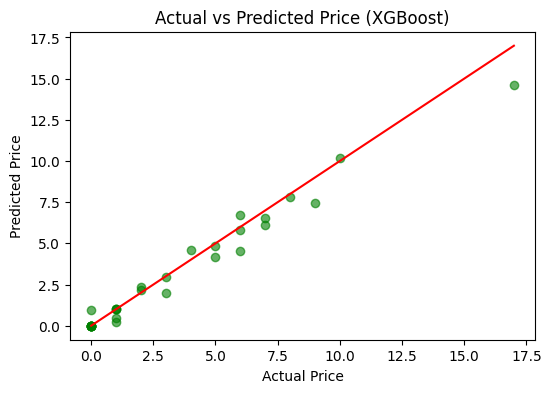

In [ ]:
from xgboost import XGBRegressor
# Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (XGBoost)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()
